In [2]:
import numpy as np

eps_N = -3
eps_G = -4
eps_A = -1
eps_NA = -1

eps_G_max = eps_N - np.log((1+np.exp(-eps_A)+np.exp(-eps_A-eps_NA))/(1+np.exp(-eps_A)))
eps_G_max2 = eps_N - np.log(np.exp(-eps_NA)-1)
print(-eps_N, -eps_G_max, -eps_G_max2)

3 4.094344276926158 3.541324854612918


0.26401558741392617 0.2640155874139923


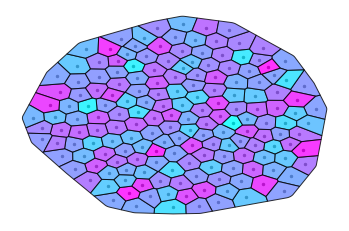

In [6]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh

Pos = np.array(pd.read_csv('testOrganoid.csv'))
FVmesh = initializeFVmesh(Pos)

def connectivity(FVmesh):
    X = np.zeros([FVmesh.nofCells, FVmesh.nofCells])

    for i in range(FVmesh.nofCells):
        for j in FVmesh.Neigh[i]:
            X[i,j] += 1/len(FVmesh.Neigh[i])
 
    return X


X = connectivity(FVmesh)
eta_n = np.exp(3)
eta_g = np.exp(4)
eta_a = np.exp(1)
eta_na = np.exp(1)

A = np.eye(FVmesh.nofCells) + eta_a*X
b = np.dot(X, np.ones(FVmesh.nofCells))*(1-1/eta_g)

a = np.linalg.solve(A, b)
g = np.linalg.solve(X, a)

print(min(g), max(g))
FVmesh.plot(g)

In [2]:
from matplotlib.colors import to_rgb
to_rgb('m')

(0.75, 0.0, 0.75)

In [141]:
from sympy import *
x, a = symbols('x, a')

p = x*a/(1+x*a)
integrate(p, a)

x*(a/x - log(a*x + 1)/x**2)

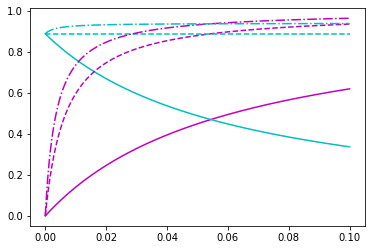

In [200]:
import numpy as np
import matplotlib.pyplot as plt

eta_a = np.exp(5)
eta_b = np.exp(6)

b = 0.02
a = np.linspace(0,0.1,1000)

p_A = lambda eta_ab: eta_a*a*(1+eta_ab*eta_b*b)/(1 + eta_a*a*(1+eta_ab*eta_b*b) + eta_b*b)
p_B = lambda eta_ab: eta_b*b*(1+eta_ab*eta_a*a)/(1 + eta_a*a*(1+eta_ab*eta_b*b) + eta_b*b)

plt.plot(a, p_A(0), 'c--')
plt.plot(a, p_A(1/2), 'c')
plt.plot(a, p_A(1), 'k')
plt.plot(a, p_A(2), 'm')

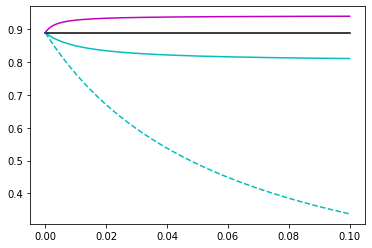

In [202]:
plt.plot(a, p_B(0), 'c--')
plt.plot(a, p_B(1/2), 'c')
plt.plot(a, p_B(1), 'k')
plt.plot(a, p_B(2), 'm')

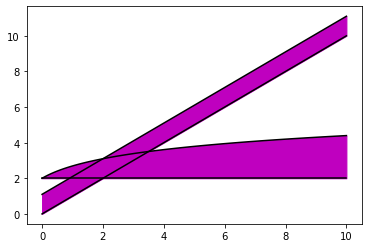

In [246]:
import numpy as np
import matplotlib.pyplot as plt

eps_N = np.linspace(0,10,100)
eps_S = np.linspace(0,10,100)
eps_G = np.linspace(0,10,100)

N, S = np.meshgrid(eps_N, eps_S)

lower = N
upper = N + np.log(1 + S*0.1)

G = np.ones(N.shape)
G[(N < lower) | (N > upper)] = 0

#plt.contourf(N, S, lower)
plt.plot(eps_N, eps_N + np.log(1 + 2*1), 'k')
plt.plot(eps_N, eps_N, 'k')
plt.fill_between(eps_N, eps_N, eps_N + np.log(1 + 2*1), color='m')

plt.plot(eps_S, 2 + np.log(1 + eps_S*1), 'k')
plt.plot(eps_S, 2 + 0*eps_S, 'k')
plt.fill_between(eps_N, 2 + 0*eps_S, 2 + np.log(1 + eps_S*1), color='m')

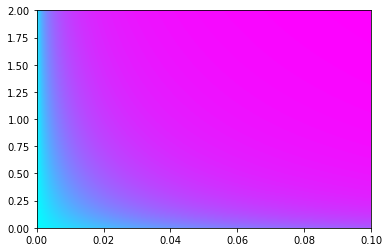

In [192]:
import numpy as np
import matplotlib.pyplot as plt

eta_a = np.exp(5)
eta_b = np.exp(6)

a = np.linspace(0,0.1,1000)
ETA = np.linspace(0,2,1000)



p_A = lambda b: eta_a*a*(1+eta_ab*eta_b*b)/(1 + eta_a*a*(1+eta_ab*eta_b*b) + eta_b*b)

plt.plot(a,eta_ab, p_A(0.02), 100, cmap = 'cool')

NameError: name 'x_mid' is not defined

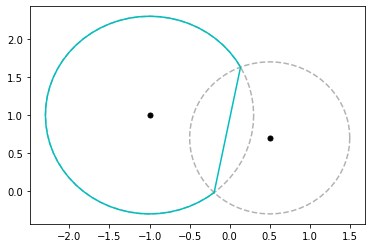

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

r1 = 1.3
r2 = 1

x1 = np.array([-1,1]).T
x2 = np.array([0.5,.7]).T

circle1 = Point(x1).buffer(r1)
circle2 = Point(x2).buffer(r2)

poly = circle1.intersection(circle2)

x,y = circle1.exterior.xy
plt.plot(x,y, 'k--', alpha = 0.3)

x,y = circle2.exterior.xy
plt.plot(x,y, 'k--', alpha = 0.3)

d = np.linalg.norm(x1-x2)
a = (r1**2 - r2**2 + d**2)/(2*d)

d12 = x2-x1
d12_orth = np.array([d12[1],-d12[0]])
sq1 = x1 + d12/d*a + d12_orth/d*r1
sq2 = x1 - d12/d*r1 + d12_orth/d*r1
sq3 = x1 - d12/d*r1 - d12_orth/d*r1
sq4 = x1 + d12/d*a - d12_orth/d*r1
square = np.array([sq1,sq2,sq3,sq4])
square = Polygon(square)

partial_circle = circle1.intersection(square)
x_new,y_new = partial_circle.exterior.xy
plt.plot(x_new,y_new, 'c')

plt.plot(x1[0],x1[1], 'ko', ms=5)
plt.plot(x2[0],x2[1], 'ko', ms=5)
plt.plot(x_mid[0],x_mid[1], 'ko', ms=5)

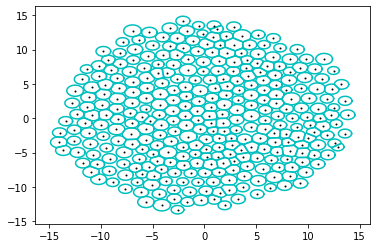

In [132]:
from scipy.spatial import Delaunay
import pandas as pd

#Pos = np.array([[-1,1],[0.5,.7],[0,2]])
#Radius = np.array([1.3,1,1])
#neighbors = [[1,2],[0,2],[0,1]]
Pos = np.array(pd.read_csv('testOrganoid_large.csv'))
Radius = np.random.normal(.7,0.07,len(Pos))

tri = Delaunay(Pos)
neigh = [0]*len(Pos)
for i in range(len(Pos)):
    neigh[i] = tri.vertex_neighbor_vertices[1][tri.vertex_neighbor_vertices[0][i]:tri.vertex_neighbor_vertices[0][i+1]]

polygons = []
for i in range(len(Pos)):
    cell1 = Point(Pos[i,:]).buffer(Radius[i])
    for j in neigh[i]:
        cell2 = Point(Pos[j,:]).buffer(Radius[j])
        poly = cell1.intersection(cell2)

        d = np.linalg.norm(Pos[i,:]-Pos[j,:])
        a = (Radius[i]**2 - Radius[j]**2 + d**2)/(2*d)
        d12 = Pos[j,:]-Pos[i,:]
        d12_orth = np.array([d12[1],-d12[0]])
        sq1 = Pos[i,:] + d12/d*a + d12_orth/d*Radius[i]
        sq2 = Pos[i,:] - d12/d*Radius[i] + d12_orth/d*Radius[i]
        sq3 = Pos[i,:] - d12/d*Radius[i] - d12_orth/d*Radius[i]
        sq4 = Pos[i,:] + d12/d*a - d12_orth/d*Radius[i]
        
        square = np.array([sq1,sq2,sq3,sq4])
        square = Polygon(square)

        cell1 = cell1.intersection(square)
        
    polygons.append(cell1)    
    x, y = cell1.exterior.xy
    plt.plot(x, y, 'c')

#i=10
#for j in neigh[i]:
#    face = polygons[i].intersection(polygons[j])

#    if face.is_empty:
#        continue
#    coords = face.exterior.xy
#    plt.plot(coords[0][0], coords[0][1], 'ko', ms=5)
#    plt.plot(coords[1][0], coords[1][1], 'ko', ms=5)
        
plt.plot(Pos[:,0],Pos[:,1], 'ko', ms=1)

624 624


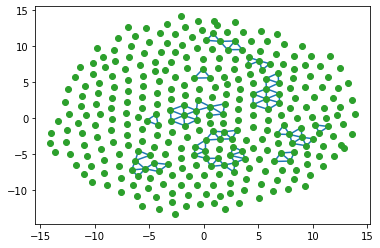

In [130]:
import pandas as pd
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import time

Dist = cdist(Pos, Pos)
tri = Delaunay(Pos)

r = Radius

a1 = Dist[tri.simplices[:,0],tri.simplices[:,1]]
a2 = Dist[tri.simplices[:,1],tri.simplices[:,2]]
a3 = Dist[tri.simplices[:,0],tri.simplices[:,2]]

b1 = r[tri.simplices[:,0]]+r[tri.simplices[:,1]]
b2 = r[tri.simplices[:,1]]+r[tri.simplices[:,2]]
b3 = r[tri.simplices[:,0]]+r[tri.simplices[:,2]]

print(len(a1), len(b1))

simplices =  tri.simplices[(a1 < b1) & (a2 < b2) & (a3 < b3)]

plt.triplot(Pos[:,0], Pos[:,1], simplices)
plt.plot(Pos[:,0], Pos[:,1], 'o')
plt.show()

In [29]:
from scipy.spatial.distance import cdist

a = np.random.rand(6)

print(a, np.maximum(a, 1))

[0.51356955 0.9835461  0.15751447 0.63753187 0.30684477 0.88062042] [1. 1. 1. 1. 1. 1.]


In [70]:
a=np.linspace(0,100,5)
np.tile(a,(2,1)).T

array([[  0.,   0.],
       [ 25.,  25.],
       [ 50.,  50.],
       [ 75.,  75.],
       [100., 100.]])

<Figure size 432x288 with 0 Axes>

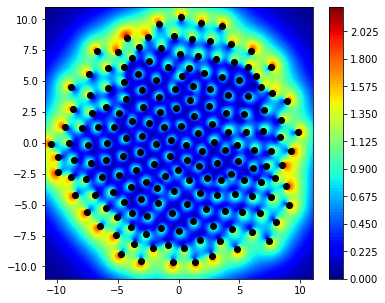

In [44]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh
import matplotlib.pyplot as plt

Pos = np.array(pd.read_csv('testOrganoid.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)

plt.figure()

def f(x):
    return np.exp(-.9*x)
    

def velocity(x,y,pos):
    norm = ((x-pos[0])**2 + (y-pos[1])**2)**(1/2)
    u = (x-pos[0])/norm*f(norm)
    v = (y-pos[1])/norm*f(norm)
    
    u[(x-pos[0])**2 + (y-pos[1])**2 == 0] = 0
    v[(x-pos[0])**2 + (y-pos[1])**2 == 0] = 0
    
    return u, v

x = np.linspace(-11,11,300)
y = np.linspace(-11,11,300)
X,Y = np.meshgrid(x,y)

U = np.zeros(X.shape)
V = np.zeros(X.shape)
for p in Pos:
    dU, dV = velocity(X,Y,p)
    U += dU
    V += dV
    
plt.figure(figsize=(6,5))
#plt.quiver(X,Y,U,V)
plt.contourf(X,Y,(U**2+V**2)**(1/2),100, cmap = 'jet')
plt.colorbar()
plt.scatter(Pos[:,0],Pos[:,1], color='k')

1.5826193829450057


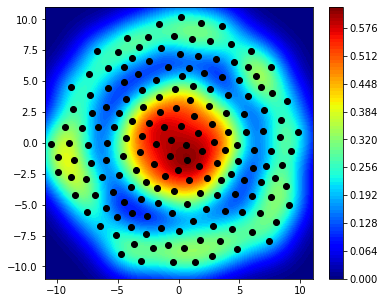

In [67]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh
import matplotlib.pyplot as plt

Pos = np.array(pd.read_csv('testOrganoid.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)

v = [0,0]
def signal(x,y,pos):
    val = ((x-pos[0])**2 + (y-pos[1])**2 - 2*v[0]*(x-pos[0]) - 2*v[1]*(y-pos[1]) + v[0]**2 + v[1]**2)
    D = 1
    s = 1/(4*np.pi*D)*np.exp(-val/(4*D))
    
    return s

x = np.linspace(-11,11,300)
y = np.linspace(-11,11,300)
X,Y = np.meshgrid(x,y)

S = np.zeros(X.shape)
for i in range(0,len(Pos)):
    if (Pos[i,0]**2 + Pos[i,1]**2)**(1/2) > 8 or (Pos[i,0]**2 + Pos[i,1]**2)**(1/2) < 5:
        S += signal(X,Y,Pos[i])
    
plt.figure(figsize=(6,5))
#plt.quiver(X,Y,U,V)
plt.contourf(X,Y,S, 100, cmap = 'jet')
plt.colorbar()
plt.scatter(Pos[:,0],Pos[:,1], color='k')
print(FVmesh.D_mean)

In [41]:
v = [0,10]
print(Pos)


[[ -4.36094285   3.59141365]
 [  6.73537679  -3.14578202]
 [  5.3716186    2.30796045]
 [ -3.33728559   5.5503607 ]
 [ -7.62120178  -2.89303505]
 [  6.967585     0.9935949 ]
 [  0.20272455  10.16085369]
 [ -8.9852504    0.02388038]
 [  5.24504192  -5.59718104]
 [ -1.74313509  -3.61480416]
 [ -4.77107727  -8.9825994 ]
 [  8.52936589  -1.77598956]
 [  1.58113174   0.77584491]
 [  0.61074212  -0.16298863]
 [ -4.22332438   8.52584377]
 [ -2.9847983    0.58642863]
 [ -5.98331676  -5.24555318]
 [  0.1314922    7.19778138]
 [  5.69588264   6.179363  ]
 [ -0.52727492  -5.70568358]
 [ -8.55444616  -1.36174523]
 [  4.40335349  -6.94240768]
 [ -3.4744086   -2.18601187]
 [  3.11891509  -1.60264478]
 [  6.71026689  -5.68467227]
 [  9.76621759   0.88482788]
 [ -0.34225977   8.67049561]
 [  2.35228747  -2.8424625 ]
 [ -7.36483137   5.56753521]
 [  4.04399304   3.84495179]
 [ -6.26923139  -2.781114  ]
 [  3.06231901   6.80499768]
 [ -6.8968304   -4.17757508]
 [  4.98322823   5.05920712]
 [  3.84155789

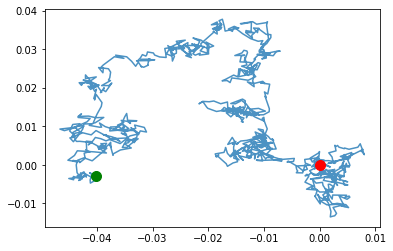

In [10]:
import numpy as np
import matplotlib.pyplot as plt

T = 1
N = 1000
t = np.linspace(0,T,N)

v = 1
x = np.empty([len(t),2])
x[0] = [0,0]
for i in range(N-1):
    x[i+1] = x[i] + v*np.random.normal(0,t[i+1]-t[i],2)
    
plt.plot(x[:,0],x[:,1], alpha = 0.8)
plt.plot(x[0,0],x[0,1], 'ro', ms = 10)
plt.plot(x[-1,0],x[-1,1], 'go', ms = 10)

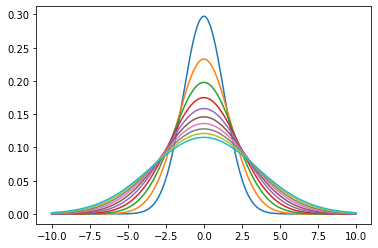

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kv

x0 = np.linspace(-10,10,1000)
T = np.linspace(0.3,2,10)
u = np.ones(len(x0))
u[x0<0] = -1
u *= 6
D = 3

for t in T:
    x = x0# - u*t
    #G1 = 3/(np.pi*t)**(1/2)*np.exp(-(x+4)**2/4/t)
    G2 = 1/(4*np.pi*D*t)**(1/2)*np.exp(-x**2/(4*D*t))
    #G3 = 4/(np.pi*t)**(1/2)*np.exp(-(x-4)**2/4/t)
    #plt.plot(x0,G1+G2+G3)
    plt.plot(x0,G2)

C:\Users\simon\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: floating point number truncated to an integer
  # This is added back by InteractiveShellApp.init_path()


(0, 1)

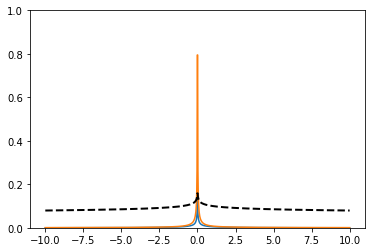

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kn

x = np.linspace(-10,10,1000)
n = 3


l = 0.1
k = 0.1
F = l*1/(2*np.pi)**(n/2)*kn(n/2-1,k*abs(x))*(k/abs(x))**(n/2-1)
G = l*np.exp(-k**2*abs(x))/(4*np.pi*abs(x))
plt.plot(x,F, x,G)
plt.plot(x,.1/abs(x)**0.1, '--k', lw = 2)
    
plt.ylim([0,1])

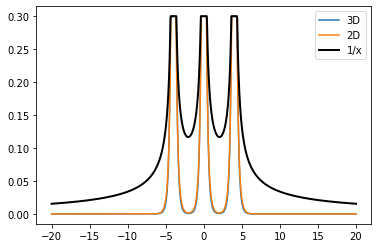

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kn

x = np.linspace(-20,20,1000)

k = 10
l = 50

F1 = l*.1*np.exp(-k**(1/2)*abs(x+4))/(4*np.pi*abs(x+4))
F2 = l*.1*np.exp(-k**(1/2)*abs(x))/(4*np.pi*abs(x))
F3 = l*.1*np.exp(-k**(1/2)*abs(x-4))/(4*np.pi*abs(x-4))
plt.plot(x,np.minimum(F1+F2+F3,.3))

F1_2D = l*.1/(2*np.pi)*kn(0,k**(1/2)*abs(x+4))
F2_2D = l*.1/(2*np.pi)*kn(0,k**(1/2)*abs(x))
F3_2D = l*.1/(2*np.pi)*kn(0,k**(1/2)*abs(x-4))
plt.plot(x,np.minimum(F1_2D+F2_2D+F3_2D,.3))

n = 1
F1_test = .1/abs(x+4)**n
F2_test = .1/abs(x)**n
F3_test = .1/abs(x-4)**n
plt.plot(x,np.minimum(F1_test+F2_test+F3_test,.3), color='k', lw = 2)
#plt.ylim([0,5])
plt.legend(['3D','2D','1/x'])

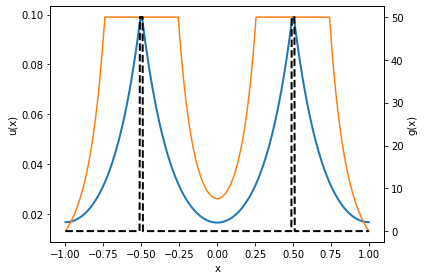

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint

N = 1000
x = np.linspace(-1,1,N)
dx = x[1]-x[0]
D = 1
k = 5
epsilon = 0.01

#RHS = np.exp(-(x-x[250])**2/(2*epsilon))/(2*np.pi*epsilon)**(1/2) + np.exp(-(x-x[750])**2/(2*epsilon))/(2*np.pi*epsilon)**(1/2)
RHS = np.zeros(len(x))
RHS[(x > -0.5-epsilon) & (x < -0.5+epsilon)] = 1/2/epsilon
RHS[(x > 0.5-epsilon) & (x < 0.5+epsilon)] = 1/2/epsilon
RHS[0] = 0
RHS[-1] = 0

def Eq2Mat(eq, N):
    E = np.eye(N)
    Mat = np.empty([N,N])
    
    for i in range(N):
        Mat[:,i] = eq(E[:,i])

    return Mat
    
def lhs(u):
    val = np.zeros(N)
    val[1:-1] = D/dx**2*(-2*u[1:-1] +  u[2:] +  u[0:-2]) - k**2*u[1:-1]

    val[0] = (u[1]-u[0])/dx
    val[-1] = (u[-1]-u[-2])/dx

    
    return val

LHS = Eq2Mat(lhs, N)

u = np.linalg.solve(-LHS, RHS)


fig, ax1 = plt.subplots()
ax1.plot(x, u, lw=2)
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
F1 = np.exp(-k*abs(x-.5))/(4*np.pi*abs(x-.5))
F2 = np.exp(-k*abs(x+.5))/(4*np.pi*abs(x+.5))
ax1.plot(x,np.minimum(F1+F2,max(u)))

ax2 = ax1.twinx()
ax2.plot(x, RHS, '--k', lw=2)
ax2.set_ylabel('g(x)')

fig.tight_layout()
plt.show()    


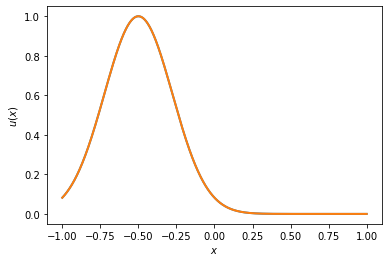

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import HTML
from matplotlib.animation import FuncAnimation


# Parameters
T = 20
Nt = 100
Nx = 1000
D = 0.01

# Discretization
t = np.linspace(0,T,Nt)
x = np.linspace(-1,1,Nx)
dt = t[1]-t[0]
dx = x[1]-x[0]

# Initial value
u0 = np.exp(-10*(x+0.5)**2)
Dx = D*np.ones(len(x))
DxL = np.roll(Dx,1)
DxR = np.roll(Dx,-1)

# Stating the right hand side

def f(u):
    return 1/(1-u+1e-7)/(u+1e-7)

def rhs_noflux(u, t):
    uL = np.roll(u,1)
    uR = np.roll(u,-1)
    
    jR = (uR-u)/dx*(DxR+Dx)/2
    jL = (u-uL)/dx*(Dx+DxL)/2
    
    # no flux boundary
    jR[-1] = 0
    jL[0] = 0
    return (jR-jL)/dx

def rhs_periodic(u, t):
    uL = np.roll(u,1)
    uR = np.roll(u,-1)
    
    jR = (uR-u)/dx*(DxR+Dx)/2
    jL = (u-uL)/dx*(Dx+DxL)/2
    
    return (jR-jL)/dx

# Solving the PDE
u = odeint(rhs_noflux, u0, t)
v = odeint(rhs_periodic, u0, t)

# Visualization
fig, ax = plt.subplots()
def update(i):
    plt.cla()
    plt.plot(x,u[i,:], linewidth=2)
    plt.plot(x,v[i,:], linewidth=2)
    plt.xlabel('$x$')
    plt.ylabel('$u(x)$')
    plt.ylim(-0.05,1.05)
    
ani = FuncAnimation(fig, update, frames=Nt, interval=1)
HTML(ani.to_jshtml())

(-0.05, 1.05)

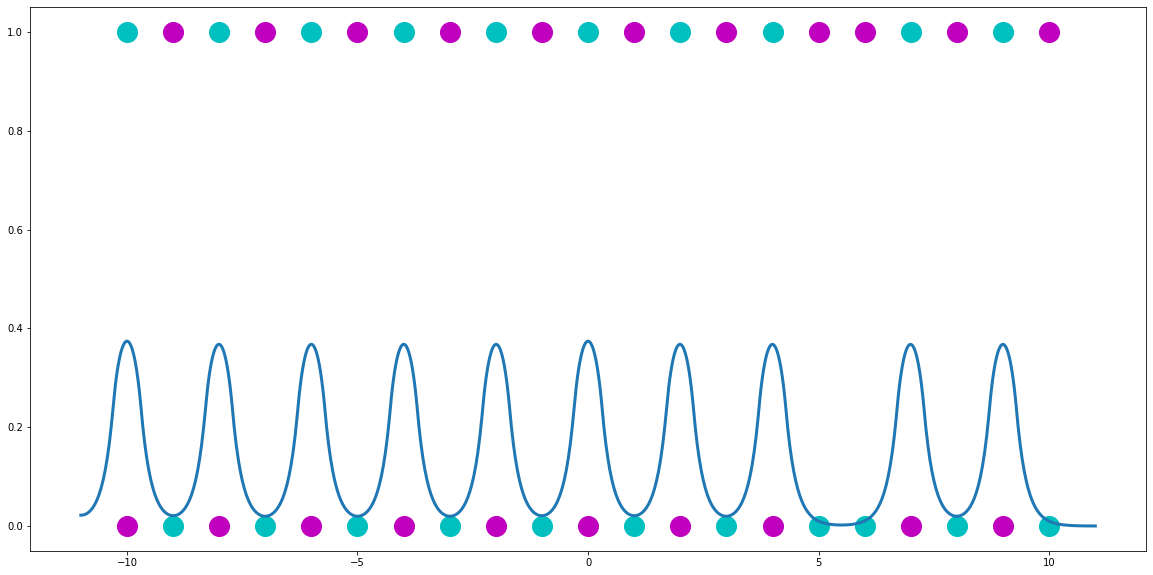

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from random import gauss

# Parameters
T = 30
Nt = 100
Nx = 1000
diffusivity = 1
production = 10
uptake = 10
decay = 10

# Discretization
t = np.linspace(0,T,Nt)
x = np.linspace(-11,11,Nx)
dt = t[1]-t[0]
dx = x[1]-x[0]

Cells = np.linspace(-10,10,21)
nofCells = len(Cells)
a = np.exp(6)
b = np.exp(8)
c = np.exp(2)
d = np.exp(2)

def signal(index, G, diffusivity, production, uptake, decay):
    A = np.zeros([Nx, Nx])
    for i in range(Nx):
        A[i,i] = -2

        if i > 0:
            A[i,i-1] = 1
        if i < Nx-1:
            A[i,i+1] = 1
            
    A[0,0] = -1
    A[-1,-1] = 1    
    A[-1,-2] = -1
    
    I = np.eye(Nx)
    I[0,0] = 0
    I[-1,-1] = 0
    
    rhs = np.zeros(Nx)
    
    rhs[(x > Cells[index]-0.3) & (x < Cells[index]+0.3)] = production*G[index]
    rhs[-1] = 0         # boundary condition
    rhs[0] = 0          # boundary condition
    
    lhs = diffusivity*decay/uptake*A/dx**2 - (decay+decay**2/uptake)*I
    
    s = np.linalg.solve(-lhs, rhs)
    
    return s



def rhs(x, t):
    rhs = np.empty(len(x))
    N = x[:nofCells]
    G = x[nofCells:]
        
    GL = np.roll(G,1)
    GR = np.roll(G,-1)
    
    #S = (GR+GL)/2
    #S[0] = G[1]
    #S[-1] = G[-2]
    s = np.zeros(nofCells, Nx)
    for i in range(nofCells):
        s[i,:] = nofCells
        
    
    pN = (a*N)*(1+d*c*S)/(1 + a*N*(1+d*c*S) + b*G + c*S)
    pG =      (b*G)     /(1 + a*N*(1+d*c*S) + b*G + c*S)

    rhs[:nofCells] = pN - N
    rhs[nofCells:] = pG - G
    
    return rhs



u0 = np.array([gauss(0.5,0.001) if i < nofCells else 
               gauss(0.5,0.001) for i in range(2*nofCells)])
u = odeint(rhs, u0, t)
N = u[:,:nofCells]
G = u[:,nofCells:]



# Visualization
#fig, ax = plt.subplots(figsize=(20,10))
def update(i):
    plt.cla()
    plt.plot(Cells, N[i,:], 'mo', ms=20)
    plt.plot(Cells, G[i,:], 'co', ms=20)
    plt.ylim(-0.05,1.05)
    
    
#ani = FuncAnimation(fig, update, frames=Nt, interval=40)
#HTML(ani.to_jshtml())
diffusivity = 1
production = 10
uptake = 10
decay = 10
#s = np.zeros(Nx)
#for j in range(nofCells):
#    s += signal(j, G[-1,:], diffusivity, production, uptake, decay)


fig, ax = plt.subplots(figsize=(20,10))
plt.plot(Cells, N[-1,:], 'mo', ms=20)
plt.plot(Cells, G[-1,:], 'co', ms=20)
#plt.plot(x, s, lw = 3)
plt.ylim(-0.05,1.05)

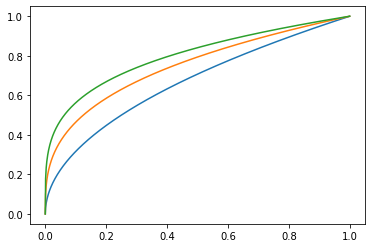

In [185]:
x = np.linspace(0,1,1000)
plt.plot(x, x**(1/2))
plt.plot(x, x**(1/3))
plt.plot(x, x**(1/4))

[1.44937965 0.82190432 0.6289833  0.50644224 0.50663775 0.51836604
 0.56044905 0.61979855 0.7955528  1.10414713 1.64876105 3.46665188
 5.93030339 7.41357692 7.48846154]


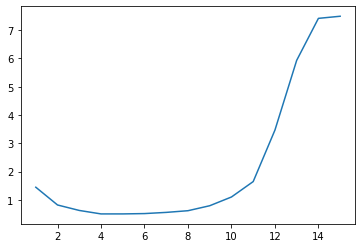

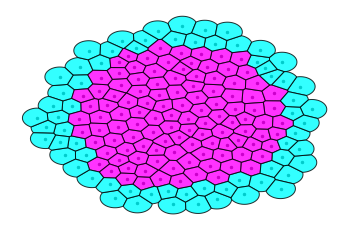

In [41]:
from Functions import fate
import numpy as np
import networkx as nx
import pandas as pd
from FVmesh import initializeFVmesh

Pos = np.array(pd.read_csv('testOrganoid.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)
N = np.zeros(FVmesh.nofCells)
for i in range(FVmesh.nofCells):
    if Pos[i,0]**2 + Pos[i,1]**2 < 8**2:
    #if i%2 == 0:
        N[i] = 1
G = 1-N

def graphdistance(FVmesh):
    Gr = nx.Graph()
    for path in FVmesh.Tri.simplices:
    
        #path1 = [path[0], path[1]]
        #path2 = [path[1], path[2]]
        #path3 = [path[2], path[0]]

        #if Dist[path1[0],path1[1]] < 2.2:
        #    nx.add_path(Gr, path1)
        #if Dist[path2[0],path2[1]] < 2.2:    
        #    nx.add_path(Gr, path2)
        #if Dist[path3[0],path3[1]] < 2.2:
        #    nx.add_path(Gr, path3)
        nx.add_path(Gr, path)
        
    dist_dict = dict(nx.all_pairs_dijkstra_path_length(Gr))
    dist = np.empty([FVmesh.nofCells, FVmesh.nofCells])
    for i in range(FVmesh.nofCells):
        for j in range(FVmesh.nofCells):
            dist[i,j] = dist_dict[i][j]
            
    return dist
    

def paircorrelation(N, G, GraphDist):
    x = np.array(fate(N, G))
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    dist = GraphDist[ind].T[ind].T
    rho0 = sum(x)/len(x)
    rho1 = (sum(x)-1)/(len(x)-1)
    
    P = np.empty(maxdist)
    for i in range(1,maxdist+1):
        P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1
        
    return P

GraphDist = graphdistance(FVmesh)
P = paircorrelation(G, N, GraphDist)


print(P)
x = [i for i in range(1,int(np.max(GraphDist))+1)]
plt.plot(x,P)
plt.figure()
FVmesh.plot(N)

C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


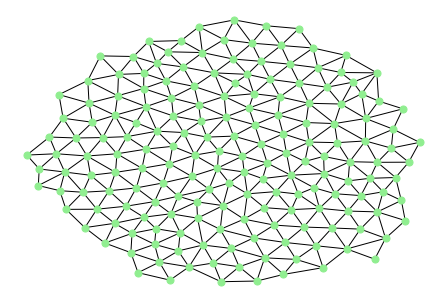

In [170]:
import networkx as nx
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh
from Functions import distance

Pos = np.array(pd.read_csv('testOrganoid.csv'))
FVmesh = initializeFVmesh(Pos, Radius = np.ones(len(Pos)))
Dist = distance(Pos)

G = nx.Graph()
for path in FVmesh.Tri.simplices:
    
    path1 = [path[0], path[1]]
    path2 = [path[1], path[2]]
    path3 = [path[2],path[0]]
    
    if Dist[path1[0],path1[1]] < 2.2:
        nx.add_path(G, path1)
    if Dist[path2[0],path2[1]] < 2.2:    
        nx.add_path(G, path2)
    if Dist[path3[0],path3[1]] < 2.2:
        nx.add_path(G, path3)

nx.draw(G, pos = Pos, with_labels=False, node_size=50, node_color='lightgreen')

In [198]:
scaling = FVmesh.GraphDist
scaling[scaling > 1] = 0
print(scaling.sum(0))

[7. 6. 7. 6. 6. 7. 3. 6. 6. 5. 2. 4. 6. 6. 3. 5. 6. 6. 5. 6. 7. 6. 6. 8.
 5. 2. 5. 6. 4. 7. 6. 6. 6. 6. 5. 5. 5. 6. 1. 6. 6. 6. 6. 6. 3. 4. 6. 5.
 6. 2. 2. 2. 7. 7. 7. 7. 3. 5. 6. 7. 6. 5. 4. 7. 6. 3. 3. 7. 6. 2. 6. 6.
 7. 5. 6. 3. 3. 6. 6. 6. 7. 3. 5. 6. 3. 6. 7. 5. 5. 7. 3. 4. 4. 2. 6. 2.
 6. 6. 6. 4. 5. 6. 6. 2. 6. 6. 7. 6. 6. 7. 3. 6. 7. 6. 5. 7. 6. 6. 6. 6.
 6. 6. 3. 6. 6. 6. 7. 7. 7. 1. 4. 2. 6. 6. 5. 3. 6. 6. 6. 7. 6. 6. 6. 3.
 5. 5. 5. 5. 6. 6. 4. 5. 6. 5. 6. 6. 3. 7. 3. 4. 5. 6. 6. 2. 6. 3. 6. 6.
 5. 5. 6. 6. 5. 5. 5. 5. 6.]


In [242]:
from Parameters import setParameters

A = FVmesh.GraphDist
A[A > 1] = 0
A = A/A.sum(0)

I = np.eye(FVmesh.nofCells)
e = np.ones(FVmesh.nofCells)

Prm = setParameters()
rG = Prm.r_G
gG = Prm.gamma_G
rN = Prm.r_N
gN = Prm.gamma_N
etaN = np.exp(-Prm.eps_N)
etaG = np.exp(-Prm.eps_G)
etaS = np.exp(-Prm.eps_S)
etaNS = np.exp(-Prm.eps_NS)



B = I+etaS/etaG*A
rhs = (rG/gG - 1/etaG)*np.dot(A,e)

S = np.linalg.solve(B, rhs)
Smax = max(S)

upper_bound = etaN*rN*gG/rG/gN*(1+etaS*etaNS*0.1)
lower_bound = etaN*rN*gG/rG/gN

print(lower_bound, upper_bound)
print(np.log(lower_bound), np.log(upper_bound))

403.4287934927351 2606.075372973407
6.0 7.865600680126628


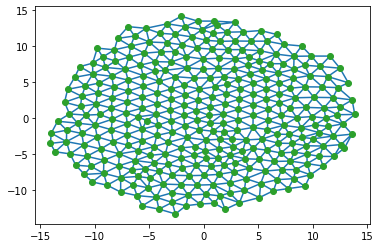

In [66]:
import pandas as pd
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import time

Pos = pd.read_csv('testOrganoid_large.csv').to_numpy()
points = Pos
Dist = cdist(Pos, Pos)
tri = Delaunay(points)

r = 1.1*np.ones(len(Pos))

a1 = Dist[tri.simplices[:,0],tri.simplices[:,1]]
a2 = Dist[tri.simplices[:,1],tri.simplices[:,2]]
a3 = Dist[tri.simplices[:,0],tri.simplices[:,2]]

b1 = r[tri.simplices[:,0]]+r[tri.simplices[:,1]]
b2 = r[tri.simplices[:,1]]+r[tri.simplices[:,2]]
b3 = r[tri.simplices[:,0]]+r[tri.simplices[:,2]]

simplices =  tri.simplices[(a1 < b1) & (a2 < b2) & (a3 < b3)]

plt.triplot(points[:,0], points[:,1], simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [61]:
for element in [1,'text',[],5.72]:
    print(type(element))

<class 'int'>
<class 'str'>
<class 'list'>
<class 'float'>


[0, 0, 0, 1, 1, 0, 1, 1]
[[1 0 3]
 [0 1 2]]
[1 3 2 0 3 2 0 1 1 0]
[ 0  3  6  8 10]
[array([1, 3, 2], dtype=int32), array([0, 3, 2], dtype=int32), array([0, 1], dtype=int32), array([1, 0], dtype=int32)]


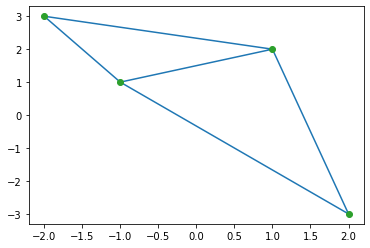

In [22]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.spatial.distance import cdist


points = np.array([[1,2], [-1,1], [2,-3], [-2,3]])
Dist = cdist(points, points)

test = []
for i in range(len(tri.simplices)):
    for j in range(len(tri.simplices)):
        if not set(tri.simplices[i]).isdisjoint(tri.simplices[j]):
            test.append(i)
            test.append(j)
            
            
print(test)
tri.neigh = [0]*len(points)
for i in range(len(points)):
    tri.neigh[i] = tri.vertex_neighbor_vertices[1][tri.vertex_neighbor_vertices[0][i]:tri.vertex_neighbor_vertices[0][i+1]]



print(tri.simplices)
print(tri.vertex_neighbor_vertices[1])
print(tri.vertex_neighbor_vertices[0])
print(tri.neigh)
#print(tri.vertex_neighbor_vertices[0][1])
#print(tri.vertex_neighbor_vertices[0][2])
plt.triplot(points[:,0], points[:,1], simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

Organoid 16 is 48h old
Organoid 16 consists of 1019 cells
6030
6280
6030
6280


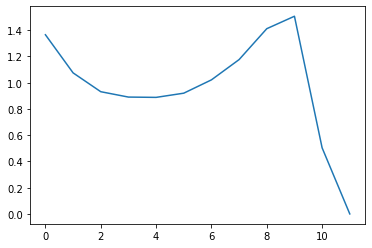

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
from Functions import fate
import networkx as nx

Data = pd.read_csv('Data/includingSurfaceDistance/extendedRawDataICMOrganoids.csv')

Organoids = max(Data['OrganoidID'])
ID = 16
Dataindex = []
Cells = []

for i in range(len(Data)):
    if Data['OrganoidID'][i] == ID:
        Dataindex.append(i)

x = np.array(Data.loc[Dataindex,'CentroidX'])
y = np.array(Data.loc[Dataindex,'CentroidY'])
z = np.array(Data.loc[Dataindex,'CentroidZ'])
N = np.array(Data.loc[Dataindex,'Nanog-Avg'])
G = np.array(Data.loc[Dataindex,'Gata6-Avg'])
Stage = np.array(Data.loc[Dataindex,'stage'])
Population = np.array(Data.loc[Dataindex,'Population'])
Nmax = max(Data.loc[Dataindex,'Nanog-Avg'])
Gmax = max(Data.loc[Dataindex,'Gata6-Avg'])
Nmin = min(Data.loc[Dataindex,'Nanog-Avg'])
Gmin = min(Data.loc[Dataindex,'Gata6-Avg'])
print('Organoid', ID, 'is', Stage[0], 'old')
print('Organoid', ID, 'consists of', len(Dataindex), 'cells')

pos = np.empty([len(x), 3])
pos[:,0] = x
pos[:,1] = y
pos[:,2] = z

N /= Nmax
G /= Gmax

Dist = cdist(pos, pos)
cutoff = 91
def graphdistance(tri):
    Gr = nx.Graph()
    
    simplices = tri.simplices[(Dist[tri.simplices[:,0],tri.simplices[:,1]] < cutoff) & 
                              (Dist[tri.simplices[:,0],tri.simplices[:,2]] < cutoff) &
                              (Dist[tri.simplices[:,0],tri.simplices[:,3]] < cutoff) &
                              (Dist[tri.simplices[:,1],tri.simplices[:,2]] < cutoff) & 
                              (Dist[tri.simplices[:,1],tri.simplices[:,3]] < cutoff) &
                              (Dist[tri.simplices[:,2],tri.simplices[:,3]] < cutoff)]
    
    print(len(simplices))
    print(len(tri.simplices))
    
    for path in simplices:
        nx.add_path(Gr, path)
        
    dist_dict = dict(nx.all_pairs_dijkstra_path_length(Gr))
    dist = np.empty([len(x), len(x)])
    for i in range(len(x)):
        for j in range(len(x)):
            dist[i,j] = dist_dict[i][j]
            
    
    return dist
   
tri = Delaunay(pos)
GraphDist = graphdistance(tri)
def paircorrelation(N, G, GraphDist):
    x = np.array(fate(G, N))
    #x = np.zeros(len(N))
    #x[(Population == 'N-G+')] = 1 #| (Population == 'N+G+')] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P

tri = Delaunay(pos)
GraphDist = graphdistance(tri)
P = paircorrelation(N, G, GraphDist)

plt.plot(P)

In [62]:
a = 2
for i in range(2):
    a += 2
for i in range(2):
    a -= 2
print(a)


2


In [76]:
print(len(Population[Population=='N+G-']), len(N[N>G]))
print(len(Population[Population=='N-G+']), len(N[N<=G]))

193 543
420 476


In [43]:
N = np.empty([9,177])
G = np.empty([9,177])

Pos, Radius, N[0,:], G[0,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=1_10/Data.csv')

45.52758273424093

(-1.450000000000001, 30.45, -5.25, 0.25)

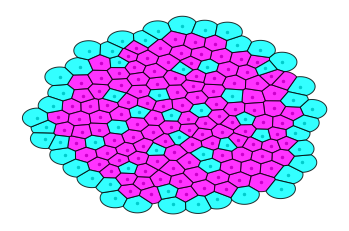

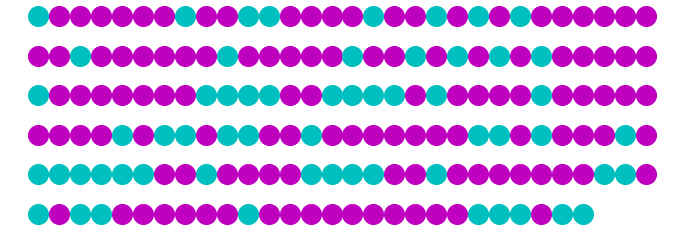

In [60]:
from FVmesh import initializeFVmesh
import matplotlib.pyplot as plt
from Functions import loadData
import numpy as np

N = np.empty(177)
G = np.empty(177)

Pos, Radius, N, G = loadData('Results/Publications/Pattern Formation/Cell Fate - q=5_10/Data.csv')
FVmesh = initializeFVmesh(Pos, Radius=Radius)

#FVmesh.plot(N)
#plt.plot(N, 'o')

N_1D = np.empty(FVmesh.nofCells)
G_1D = np.empty(FVmesh.nofCells)
FVmesh.Dist[FVmesh.Dist==0] = 1e5
for i in range(FVmesh.nofCells):
    if i == 0:
        search_column = FVmesh.Dist[:,i]
    else:
        search_column = FVmesh.Dist[:,idx]
        
    val, idx = min((val, idx) for (idx, val) in enumerate(search_column))
    
    N_1D[i] = N[idx]
    G_1D[i] = G[idx]
    FVmesh.Dist[idx,:] = 1e5
    

    
plt.figure()
FVmesh.plot(N)

plt.figure(figsize=(12,4))
k = 1
K = 30
for i in range(FVmesh.nofCells):
    if i%K == 0:
        k -= 1
    if N_1D[i] > G_1D[i]:
        plt.scatter(i%K, k, color='m', s=400)
    if N_1D[i] <= G_1D[i]:
        plt.scatter(i%K, k, color='c', s=400)
        
plt.axis('off')

Expected cell division time = 4.384417555550494
Expected number of Cells = 274.2130458240521
324


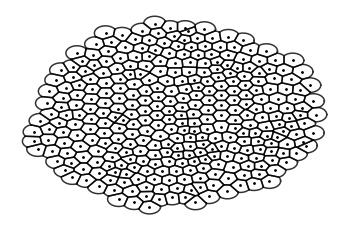

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from FVmesh import initializeFVmesh
from Organoid2D import initializeOrganoid
from Parameters import setParameters

Prm = setParameters()
Prm.sigma = 1
Prm.nofCells_end = 400
Prm.F0 = 1
Prm.alpha = 2
Organoid = initializeOrganoid(Prm, Transcription=False)
Pos = Organoid.Pos
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)

FVmesh.plot()
print(FVmesh.nofCells)

Organoid 1 is 24h old
Organoid 1 consists of 693 cells
Organoid 1 consists of 265 NANOG cells
Organoid 1 consists of 119 GATA6 cells
Organoid 1 has a NANOG:GATA6 ratio of 2.226890756302521


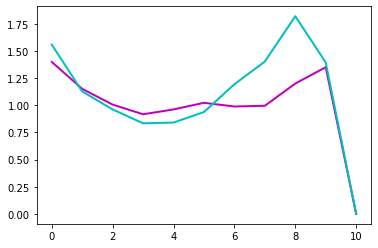

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
from Functions import fate
import networkx as nx
from Model import rhs_activation
from Parameters import setParameters
from scipy.integrate import solve_ivp


Data = pd.read_csv('Data/includingSurfaceDistance/extendedRawDataICMOrganoids.csv')

Organoids = max(Data['OrganoidID'])
ID = 1#62
Dataindex = []
Cells = []

for i in range(len(Data)):
    if Data['OrganoidID'][i] == ID:
        Dataindex.append(i)

x = np.array(Data.loc[Dataindex,'CentroidX'])
y = np.array(Data.loc[Dataindex,'CentroidY'])
z = np.array(Data.loc[Dataindex,'CentroidZ'])
N = np.array(Data.loc[Dataindex,'Nanog-Avg'])
G = np.array(Data.loc[Dataindex,'Gata6-Avg'])
Stage = np.array(Data.loc[Dataindex,'stage'])
Population = np.array(Data.loc[Dataindex,'Population'])
Nmax = max(Data.loc[Dataindex,'Nanog-Avg'])
Gmax = max(Data.loc[Dataindex,'Gata6-Avg'])
Nmin = min(Data.loc[Dataindex,'Nanog-Avg'])
Gmin = min(Data.loc[Dataindex,'Gata6-Avg'])
print('Organoid', ID, 'is', Stage[0], 'old')
print('Organoid', ID, 'consists of', len(Dataindex), 'cells')
print('Organoid', ID, 'consists of', len(x[Population=='N+G-']), 'NANOG cells')
print('Organoid', ID, 'consists of', len(x[Population=='N-G+']), 'GATA6 cells')
print('Organoid', ID, 'has a NANOG:GATA6 ratio of', len(x[Population=='N+G-'])/len(x[Population=='N-G+']))

pos = np.empty([len(x), 3])
pos[:,0] = x
pos[:,1] = y
pos[:,2] = z

Dist = cdist(pos, pos)
cutoff = 91
def graphdistance(tri):
    Gr = nx.Graph()
    
    simplices = tri.simplices[(Dist[tri.simplices[:,0],tri.simplices[:,1]] < cutoff) & 
                              (Dist[tri.simplices[:,0],tri.simplices[:,2]] < cutoff) &
                              (Dist[tri.simplices[:,0],tri.simplices[:,3]] < cutoff) &
                              (Dist[tri.simplices[:,1],tri.simplices[:,2]] < cutoff) & 
                              (Dist[tri.simplices[:,1],tri.simplices[:,3]] < cutoff) &
                              (Dist[tri.simplices[:,2],tri.simplices[:,3]] < cutoff)]
    
    for path in simplices:
        nx.add_path(Gr, path)
        
    dist_dict = dict(nx.all_pairs_dijkstra_path_length(Gr))
    dist = np.empty([len(x), len(x)])
    for i in range(len(x)):
        for j in range(len(x)):
            dist[i,j] = dist_dict[i][j]
            
    
    return dist
   
tri = Delaunay(pos)
GraphDist = graphdistance(tri)
def paircorrelation(Pop, GraphDist):
    x = np.zeros(len(N))
    x[(Population == Pop)] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P

tri = Delaunay(pos)
P1 = paircorrelation('N+G-', GraphDist)
P2 = paircorrelation('N-G+', GraphDist)

plt.plot(P1, 'm', lw=2)
plt.plot(P2, 'c', lw=2)

In [4]:
import pandas as pd
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import networkx as nx


Data = pd.read_csv('Data/includingSurfaceDistance/extendedRawDataICMOrganoids.csv')
ID = 1
Organoid = Data[Data['OrganoidID'] ==  ID]
x = np.array(Organoid['CentroidX'])
y = np.array(Organoid['CentroidY'])
z = np.array(Organoid['CentroidZ'])

pos = np.empty([len(x), 3])
pos[:,0] = x
pos[:,1] = y
pos[:,2] = z

Dist = cdist(pos, pos)
cutoff = 91

tri = Delaunay(pos)
def graphdistance(tri):
    Gr = nx.Graph()
    
    simplices = tri.simplices[(Dist[tri.simplices[:,0],tri.simplices[:,1]] < cutoff) & 
                              (Dist[tri.simplices[:,0],tri.simplices[:,2]] < cutoff) &
                              (Dist[tri.simplices[:,0],tri.simplices[:,3]] < cutoff) &
                              (Dist[tri.simplices[:,1],tri.simplices[:,2]] < cutoff) & 
                              (Dist[tri.simplices[:,1],tri.simplices[:,3]] < cutoff) &
                              (Dist[tri.simplices[:,2],tri.simplices[:,3]] < cutoff)]
    
    for path in simplices:
        nx.add_path(Gr, path)
        
    dist_dict = dict(nx.all_pairs_dijkstra_path_length(Gr))
    dist = np.empty([len(x), len(x)])
    for i in range(len(x)):
        for j in range(len(x)):
            dist[i,j] = dist_dict[i][j]
            
    
    return dist

dist = graphdistance(tri)

[[0. 2. 3. ... 8. 9. 7.]
 [2. 0. 1. ... 7. 9. 7.]
 [3. 1. 0. ... 7. 8. 7.]
 ...
 [8. 7. 7. ... 0. 3. 1.]
 [9. 9. 8. ... 3. 0. 2.]
 [7. 7. 7. ... 1. 2. 0.]]


0.2696479543292103 546.0 1051
0.06877803452494223 276.0 1051


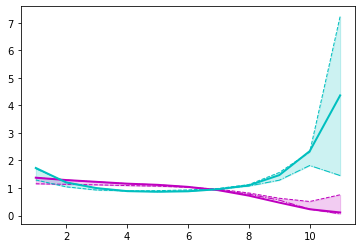

In [113]:
def paircorrelation_new(Pop, GraphDist):
    x = np.zeros(len(Population))
    y = np.zeros(len(Population))
    z = np.zeros(len(Population))
    x[(Population == Pop)] = 1
    y[(Population == Pop) | (Population == 'N+G+') | (Population == 'N-G-')] = 1
    z[(Population == 'N+G+') | (Population == 'N-G-')] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    cor_ind = np.where(y==1)[0]
    new_ind = np.where(z==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        equal = GraphDist[ind].T[ind].T
        mixed = GraphDist[cor_ind].T[cor_ind].T
        none = GraphDist[new_ind].T[new_ind].T
        
        rho_equal = sum(x)*(sum(x)-1)/len(x)/(len(x)-1)
        print(rho_equal, sum(x), len(x))

        P_min = np.empty(maxdist)
        P_max = np.empty(maxdist)
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            
            cells0 = 0
            cells1 = 0
            cells2 = 0
            for j in range(equal.shape[0]):  
                if i in equal[j,:]:
                    cells1 += 1
    
            for j in range(mixed.shape[0]):
                if i in mixed[j,:]:
                    cells2 += 1
                    
            for j in range(none.shape[0]):
                if i in none[j,:]:
                    cells0 += 1
            
            cells_including = sum(x) + (cells2 - cells1)
            cells_excluding = sum(y) - (cells2 - cells1)
            rho_mixed_inc = cells_including*(cells_including-1)/len(x)/(len(x)-1)
            rho_mixed_exc = cells_excluding*(cells_excluding-1)/len(x)/(len(x)-1)
            
            P_min[i-1] = len(equal[equal==i])/len(GraphDist[GraphDist==i])/rho_mixed_exc
            P[i-1] = len(equal[equal==i])/len(GraphDist[GraphDist==i])/rho_equal
            P_max[i-1] = len(mixed[mixed==i])/len(GraphDist[GraphDist==i])/rho_mixed_inc
            

    return P_min, P_max, P


PN_min, PN_max, PN = paircorrelation_new('N+G-', GraphDist)
PG_min, PG_max, PG = paircorrelation_new('N-G+', GraphDist)

#plt.figure(figsize=(15,15))
maxdist = int(np.max(GraphDist))
x = list(range(1,maxdist+1))
plt.plot(x, PN_min, 'm-.', lw=1)
plt.plot(x, PG_min, 'c-.', lw=1)
plt.plot(x, PN_max, 'm--', lw=1)
plt.plot(x, PG_max, 'c--', lw=1)
plt.fill_between(x, PN_min, PN_max, color='m', alpha = 0.2)
plt.fill_between(x, PG_min, PG_max, color='c', alpha = 0.2)
plt.plot(x, PN, 'm', lw=2)
plt.plot(x, PG, 'c', lw=2)
            
#plt.plot(PU1, 'k', lw=2)
#plt.plot(PU2, 'k', lw=2)

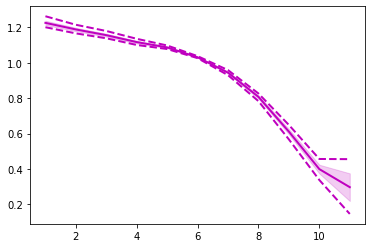

In [10]:
N = 100
maxdist = int(np.max(GraphDist))
x = np.zeros([len(Population), N])
x[(Population == 'N+G-')] = 1
x[(Population == 'N+G+') | (Population == 'N-G-')] = np.random.random(x[(Population == 'N+G+') | (Population == 'N-G-')].shape)
ratio = 0.5#len(x[(Population == 'N-G+')])/len(x[(Population == 'N-G+') | (Population == 'N+G-')])
x[x > ratio] = 1
x[x <= ratio] = 0
cells = x.shape[0]
cells_x = np.sum(x, axis=0)
rho = cells_x*(cells_x - 1)/(cells*(cells - 1))

P = np.zeros([maxdist,N])
for j in range(N):
    ind = np.where(x[:,j]==1)[0]
    pairs = GraphDist[ind].T[ind].T
    
    for i in range(1,maxdist+1):
        P[i-1,j] = len(pairs[pairs==i])/len(GraphDist[GraphDist==i])/rho[j]
        
P_mean = np.mean(P, axis=1)
P_std = np.std(P, axis=1, ddof=1)
P_max = np.max(P, axis=1)
P_min = np.min(P, axis=1)

maxdist = int(np.max(GraphDist))
ranges = list(range(1,maxdist+1))
plt.plot(ranges, P_mean, 'm', lw=2)
plt.fill_between(ranges, P_mean-P_std, P_mean+P_std, color='m', alpha=0.2)
plt.plot(ranges, P_max, 'm--', lw=2)
plt.plot(ranges, P_min, 'm--', lw=2)

In [111]:
A = np.array([[1,1,1,1], [1, 1, 1, 1]])
np.sum(A, axis = 0)

array([2, 2, 2, 2])

In [185]:
q = 0.9
s_max = np.max((1-q)/q*np.sum(0.1*q**GraphDist, axis=0))
Prm = setParameters()
upper_boundary = -Prm.eps_N + np.log(1 + np.exp(-Prm.eps_S-Prm.eps_NS)*s_max)
print(upper_boundary)

12.008072920422201


In [162]:
q = 0.1
eta_S = np.exp(-Prm.eps_S)
A = eta_S*(1-q)/q*q**GraphDist + np.eye(GraphDist.shape[0])
b = 0.1*np.ones(GraphDist.shape[0])
g = np.linalg.solve(A, b)
print(min(g), max(g))

s_max = np.max((1-q)/q*np.sum(g*q**GraphDist, axis=1))
Prm = setParameters()
upper_boundary = -Prm.eps_N + np.log(1 + np.exp(-Prm.eps_S-Prm.eps_NS)*s_max)
print(-Prm.eps_N, upper_boundary)

-4.8522652539661676e-05 0.0011188473931446567
6 6.553462119463826


In [188]:
from FVmesh import initializeFVmesh
from Parameters import setParameters

Prm = setParameters()
Prm.T = 24
Prm.nofSteps = 3000
Prm.range = 0.9
Prm.eps_G = -12.1
FVmesh = initializeFVmesh(pos, reduced=True)
FVmesh.GraphDist = GraphDist

t = np.linspace(0,Prm.T,Prm.nofSteps)

x0 = [Prm.r_N/Prm.gamma_N*3/4, Prm.r_G/Prm.gamma_G*3/4]
xInit = np.append(np.random.normal(x0[0], x0[0]*0.01, FVmesh.nofCells),
                  np.random.normal(x0[1], x0[1]*0.01, FVmesh.nofCells))
rhs = lambda t,x: rhs_activation(0, x, Prm, FVmesh)
x = np.empty([2*FVmesh.nofCells, Prm.nofSteps])
x[:,0] = xInit

for i in range(1, len(t)):
    x[:,i] = x[:,i-1] + (t[i]-t[i-1])*rhs(t[i-1],x[:,i-1])
    
    
N = x[:FVmesh.nofCells,-1]
G = x[FVmesh.nofCells:,-1]

Number of NANOG Cells = 0
Number of GATA6 Cells = 1051
Ratio =  0.0


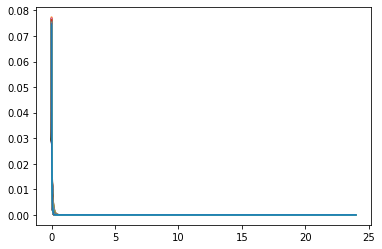

In [189]:
print('Number of NANOG Cells =', len(N[N>G]))
print('Number of GATA6 Cells =', len(G[G>N]))
print('Ratio = ', len(N[N>G])/len(G[G>N]))
plt.plot(t, x[:FVmesh.nofCells, :].T);

In [16]:
from Functions import graphdistance3D, loadExpData, pc_bounds
from Parameters import setParameters
from FVmesh import initializeFVmesh
from Model import rhs_activation
import numpy as np
import matplotlib.pyplot as plt

ID = 62
N, G, Pop, Pos = loadExpData(ID)
GraphDist = graphdistance3D(Pos)
PN_min, PN_max, PG_min, PG_max = pc_bounds(Pop, GraphDist, 10)

Prm = setParameters()
Prm.T = 24
Prm.nofSteps = 3000
Prm.range = 0.1
Prm.eps_G = -9
FVmesh = initializeFVmesh(Pos, reduced=True)
FVmesh.GraphDist = GraphDist

t = np.linspace(0,Prm.T,Prm.nofSteps)

x0 = [Prm.r_N/Prm.gamma_N*3/4, Prm.r_G/Prm.gamma_G*3/4]
xInit = np.append(np.random.normal(x0[0], x0[0]*0.01, FVmesh.nofCells),
                  np.random.normal(x0[1], x0[1]*0.01, FVmesh.nofCells))
rhs = lambda t,x: rhs_activation(0, x, Prm, FVmesh)
x = np.empty([2*FVmesh.nofCells, Prm.nofSteps])
x[:,0] = xInit

for i in range(1, len(t)):
    x[:,i] = x[:,i-1] + (t[i]-t[i-1])*rhs(t[i-1],x[:,i-1])
    
    
N = x[:FVmesh.nofCells,-1]
G = x[FVmesh.nofCells:,-1]

def paircorrelation(N, G, GraphDist):
    x = np.zeros(len(N))
    x[N > G] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P

PN = paircorrelation(N, G, GraphDist)
PG = paircorrelation(G, N, GraphDist)

Organoid 62 is 48h old
Organoid 62 consists of 1051 cells
Organoid 62 consists of 546 NANOG cells
Organoid 62 consists of 276 GATA6 cells
Organoid 62 has a NANOG:GATA6 ratio of 1.9782608695652173


1.848238482384824


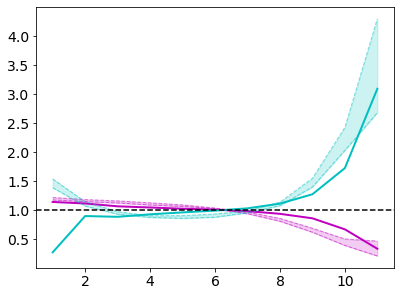

In [17]:
maxdist = int(np.max(GraphDist))
ranges = list(range(1,maxdist+1))
PN_min, PN_max, PG_min, PG_max = pc_bounds(Pop, GraphDist, 100)

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
plt.plot(ranges, PN, 'm', lw=2)
plt.plot(ranges, PG, 'c', lw=2)

plt.plot(ranges, PN_max, 'm--', lw=1, alpha=0.5)
plt.plot(ranges, PN_min, 'm--', lw=1, alpha=0.5)
plt.fill_between(ranges, PN_min, PN_max, color='m', alpha=0.2)

plt.plot(ranges, PG_max, 'c--', lw=1, alpha=0.5)
plt.plot(ranges, PG_min, 'c--', lw=1, alpha=0.5)
plt.fill_between(ranges, PG_min, PG_max, color='c', alpha=0.2)

plt.axhline(1, color='black', linestyle='dashed')
print(len(N[N>G])/len(G[G>=N]))

In [4]:
from time import time

tic = time()
for i in range(2000):
    for j in range(6000):
        x = i+j
        
toc = time()
print(toc-tic)

1.0851013660430908


158.0 158.0


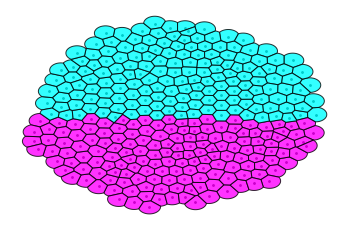

1914 1842
0.30864197530864196% of cells have exactly 2.0 neighbors
0.9259259259259258% of cells have exactly 3.0 neighbors
4.320987654320987% of cells have exactly 4.0 neighbors
23.765432098765434% of cells have exactly 5.0 neighbors
56.481481481481474% of cells have exactly 6.0 neighbors
14.19753086419753% of cells have exactly 7.0 neighbors


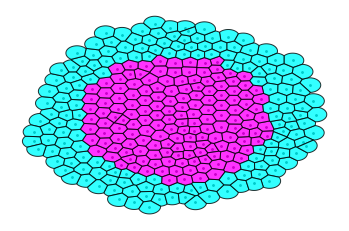

In [251]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh
import matplotlib.pyplot as plt

Pos = np.array(pd.read_csv('testOrganoid_large.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)

F1 = np.zeros(len(Pos))
F2 = np.zeros(len(Pos))

F1[Pos[:,1] < 0] = 1
F2[Pos[:,0]**2 + Pos[:,1]**2 < 9.45**2] = 1

print(sum(F1), sum(F2))
FVmesh.plot(F1)
plt.show()
FVmesh.plot(F2)

def energy(F, FVmesh):
    E = 0
    for i in range(len(F)):
        neighbors = np.where(FVmesh.GraphDist[:,i] == 1)
        for j in neighbors[0]:
            if F[i] == 0 and F[j] == 0:
                E += 2
            if F[i] == 1 and F[j] == 1:
                E += 0
            if F[i] == 1 and F[j] == 0:
                E += 1
            if F[i] == 0 and F[j] == 1:
                E += 1
                
    return E

E1 = energy(F1, FVmesh)
E2 = energy(F2, FVmesh)
print(E1, E2)
FVmesh.GraphDist[FVmesh.GraphDist > 1] = 0 
nofNeigh = np.sum(FVmesh.GraphDist, axis = 1)
counts = np.unique(nofNeigh)
for c in counts:
    A = len(nofNeigh[nofNeigh == c])
    B = len(nofNeigh)
    print(str(A/B*100) + '% of cells have exactly ' + str(c) + ' neighbors')

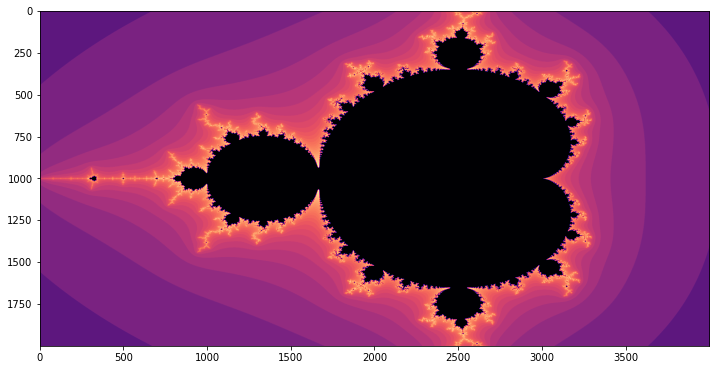

In [90]:
# Mandelbrot set
import numpy as np
import matplotlib.pyplot as plt

def iteration(z0, maxiter):
    z = [0]*maxiter
    z[0] = z0
    val = 0
    for i in range(maxiter-1):
        z_new = z[i]**2 + z[0]
        if z_new in z:
            val = 0
            break
            
        if abs(z_new) > 1e3:
            val = np.log(i)
            break
        else:
            val = 0
            
        z[i+1] = z_new

    return val
    

X = np.linspace(-2,1,4000)
Y = np.linspace(-1,1,2000)

Z = np.empty([len(X), len(Y)])
for i,x in enumerate(X):
    for j,y in enumerate(Y):
        z = x+y*1j
        val = iteration(z, 50)
        Z[i,j] = val

plt.figure(figsize=(12,8))
plt.imshow(Z.T, cmap='magma')

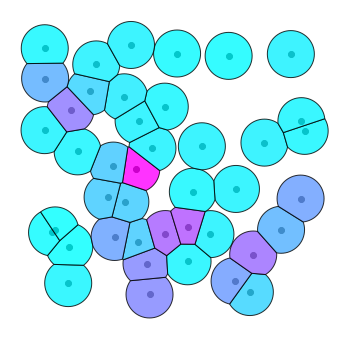

In [8]:
import pandas as pd
import numpy as np
from FVmesh import initializeFVmesh
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

num = 3
Data = pd.read_csv('DatenSimon/2D data/TetG6C4_6hdox24hSL_0hCHX_NANOGg_Gata6r_Gata4Wc'+str(num)+'.ome_channel=0001_frame=0001_statistics.csv')
x = Data[' X'].to_numpy()
y = Data[' Y'].to_numpy()

N = Data[' CH2-Avg'].to_numpy()
G = Data[' CH3-Avg'].to_numpy()
F = np.zeros(len(N))
F[N/max(N) > G/max(G)] = 1

xy = np.concatenate(([x], [y]), axis=0).T
FVmesh = initializeFVmesh(xy, Radius=np.ones(len(xy))*45.5)
plt.figure(figsize=(6,6))
FVmesh.plot(N)
plt.axis('equal')

In [5]:
15/3000

0.005

In [33]:
np.floor(FVmesh.Dist/91)

array([[0., 2., 1., ..., 5., 5., 5.],
       [2., 0., 3., ..., 5., 5., 6.],
       [1., 3., 0., ..., 5., 5., 5.],
       ...,
       [5., 5., 5., ..., 0., 0., 2.],
       [5., 5., 5., ..., 0., 0., 1.],
       [5., 6., 5., ..., 2., 1., 0.]])